# Global consumer electronic brand sales analysis



## Importing libraries and data

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sqlalchemy import create_engine, MetaData, Table, ForeignKey
from sqlalchemy import Column, Integer, String, inspect, Float, Date, join, select
import os
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
init_notebook_mode(connected=True) 
engine = create_engine("sqlite:///database/my_database.db")
metadata = MetaData()
metadata.bind = engine

## Data Visualization

This step includes exploratory data visualization to enhance understanding of the dataset.

### Transactions per Country

In [29]:
customers_sales_df = pd.read_sql('''SELECT * FROM sales
INNER JOIN customers ON sales.CustomerKey = customers.CustomerKey;''', engine)

In [30]:
sales_count = customers_sales_df.value_counts('Country').reset_index().rename(columns={'count':'Count'})
sales_count.head()

,Country,Count
0,United States,33767
1,United Kingdom,8140
2,Germany,5956
3,Canada,5415
4,Australia,2941


In [31]:
data = go.Choropleth(
    locations=sales_count['Country'],
    z=sales_count['Count'],
    locationmode = "country names",
    text=sales_count['Country'],
    colorbar={'title': '# Sales'},
    colorscale='Blugrn',  
)

layout = go.Layout(
    title='Sales per Country',
    geo=dict(
        showframe=False,
        projection={'type': 'natural earth'}  ,
        bgcolor='grey',
    ),
    paper_bgcolor='grey',
)



choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

The majority of the company's sales are concentrated in North America, with approximately 40,000 transactions in the United States and Canada. Europe is another key market, with Germany and the United Kingdom leading in sales.

### Revenue per Country

In [32]:
products_sales_df = pd.read_sql('''SELECT Sales.Quantity, customers.Country, products.'Unit Price USD', sales.'Currency Code', exchange_rates.Exchange, exchange_rates.Date FROM sales
INNER JOIN products ON sales.ProductKey = products.ProductKey
INNER JOIN customers ON sales.CustomerKey = customers.CustomerKey
INNER JOIN exchange_rates ON sales.'Currency Code' = exchange_rates.Currency AND sales.'Order Date' = exchange_rates.Date''', engine)

In [33]:
# Calculating revenue per transaction, converted to USD. 
products_sales_df['Revenue'] = (products_sales_df['Unit Price USD'] * products_sales_df['Quantity']) / products_sales_df['Exchange']

In [34]:
country_revenue = products_sales_df.groupby('Country')['Revenue'].sum().reset_index().sort_values(by='Revenue', ascending=False)
country_revenue['Revenue'] = country_revenue['Revenue'].astype('int64')

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'United States'),
  Text(1, 0, 'United Kingdom'),
  Text(2, 0, 'Germany'),
  Text(3, 0, 'Canada'),
  Text(4, 0, 'Italy'),
  Text(5, 0, 'Netherlands'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'France')])

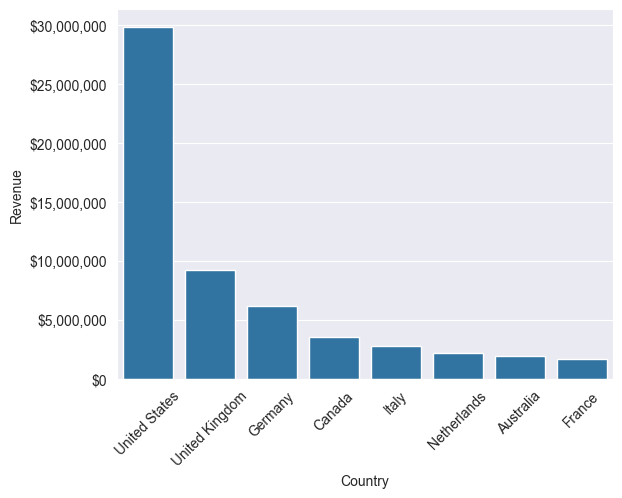

In [35]:
sns.barplot(x='Country',y='Revenue',data=country_revenue)
plt.ticklabel_format(style='plain', axis='y')
formatter = FuncFormatter(lambda x, _: f'${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(rotation=45)


The United States is the largest buyer, with total revenue nearing `$30 million` during the period, followed by the United Kingdom at approximately `$10 million`. These two countries significantly outspend others, where the median revenue is around `$3.1 million`. The lowest spenders in this period are Australia and France.